In [1]:
# Import necessary modules
import numpy as np
from algorithms.lsh_mips import LSH_MIPS
from utils.constants import SCALING_TOPK, SCALING_NUM_HFUNC, SCALING_NUM_TABLES, ASYMMETRIC, SYMMETRIC



In [2]:
# Generate synthetic test data
def generate_test_data(num_atoms, len_signal):
    atoms = np.random.randn(num_atoms, len_signal)
    signals = np.random.randn(1, len_signal)  # Single signal
    return atoms, signals

# Parameters for testing
num_atoms = 100
len_signal = 50
atoms, signals = generate_test_data(num_atoms, len_signal)

# Initialize LSH_MIPS object and test
lsh_mips = LSH_MIPS(
    m=3, 
    num_hfunc=5, 
    num_tables=10, 
    type=ASYMMETRIC
)

# Preprocess and run the LSH_MIPS algorithm
lsh_mips.preprocess_data(atoms)
lsh_mips.preprocess_query(signals[0])
candidates, budget = lsh_mips.run(top_k=5)

# Output results
print(f"Top 5 candidates: {candidates}")
print(f"Budget (number of computations): {budget}")


Top 5 candidates: [47 81 30 31 93]
Budget (number of computations): 5777


In [3]:
# Naive method: Calculate the top k atoms based on the highest inner product with the signal
inner_products = np.dot(atoms, signals[0])
top_k_naive = np.argsort(inner_products)[-5:]  # Get the indices of top 5 atoms

# Evaluate accuracy
accuracy = len(np.intersect1d(candidates, top_k_naive)) / 5
print(f"Accuracy of LSH_MIPS: {accuracy * 100}%")


Accuracy of LSH_MIPS: 80.0%


Movie Lens 100k

In [4]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from algorithms.lsh_mips import LSH_MIPS
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load the MovieLens dataset (100k version for simplicity)
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=0.2)

# Build a user-item matrix
user_item_matrix = np.zeros((trainset.n_users, trainset.n_items))
for uid, iid, rating in trainset.all_ratings():
    user_item_matrix[int(uid), int(iid)] = rating

# Use SVD to reduce dimensionality
svd = TruncatedSVD(n_components=50)
atoms = svd.fit_transform(user_item_matrix.T)  # Transpose to get item embeddings

# Create a signal (simulate a user's preference vector)
user_id = 0  # Choose a user ID from the dataset
user_ratings = user_item_matrix[user_id]
signal = np.dot(user_ratings, atoms)  # Weighted average of rated item embeddings

# Initialize and run LSH_MIPS
lsh_mips = LSH_MIPS(m=3, num_hfunc=5, num_tables=10, type="ASYMMETRIC")
lsh_mips.preprocess_data(atoms)
lsh_mips.preprocess_query(signal)

# Get top 5 candidates
top_k = 10
candidates, budget = lsh_mips.run(top_k=top_k)

# Compare with naive method for evaluation
inner_products = np.dot(atoms, signal)
top_k_naive = np.argsort(inner_products)[-top_k:]

accuracy = len(np.intersect1d(candidates, top_k_naive)) / top_k
print(f"Top {top_k} candidates: {candidates}")
print(f"Budget (number of computations): {budget}")
print(f"Accuracy compared to naive method: {accuracy * 100}%")


Top 10 candidates: [ 12 161 321 103 104 163 106  81 345 453]
Budget (number of computations): 86920
Accuracy compared to naive method: 80.0%


In [5]:
len(user_item_matrix)

943

Movie Lens 1M

In [12]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from algorithms.lsh_mips import LSH_MIPS
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Load the MovieLens dataset (100k version for simplicity)
reader = Reader(line_format='user item rating timestamp', sep='\t')
data = Dataset.load_builtin('ml-1m')
trainset, testset = train_test_split(data, test_size=0.2)

# Build a user-item matrix
user_item_matrix = np.zeros((trainset.n_users, trainset.n_items))
for uid, iid, rating in trainset.all_ratings():
    user_item_matrix[int(uid), int(iid)] = rating

# Use SVD to reduce dimensionality
svd = TruncatedSVD(n_components=50)
atoms = svd.fit_transform(user_item_matrix.T)  # Transpose to get item embeddings

# Create a signal (simulate a user's preference vector)
user_id = 6039  # Choose a user ID from the dataset
user_ratings = user_item_matrix[user_id]
signal = np.dot(user_ratings, atoms)  # Weighted average of rated item embeddings

# Initialize and run LSH_MIPS
lsh_mips = LSH_MIPS(m=3, num_hfunc=5, num_tables=10, type="ASYMMETRIC")
lsh_mips.preprocess_data(atoms)
lsh_mips.preprocess_query(signal)

# Get top 5 candidates
top_k = 10
candidates, budget = lsh_mips.run(top_k=top_k)

# Compare with naive method for evaluation
inner_products = np.dot(atoms, signal)
top_k_naive = np.argsort(inner_products)[-top_k:]

accuracy = len(np.intersect1d(candidates, top_k_naive)) / top_k
print(f"Top {top_k} candidates: {candidates}")
print(f"Budget (number of computations): {budget}")
print(f"Accuracy compared to naive method: {accuracy * 100}%")


Top 10 candidates: [ 80 256 704  99  86 272 295 276  27  50]
Budget (number of computations): 96672
Accuracy compared to naive method: 80.0%


In [13]:
len(user_item_matrix)

6040

Netflix Dataset

In [14]:
import numpy as np
from algorithms.lsh_mips import LSH_MIPS

# Load preprocessed factors and biases
movie_factors = np.load("../BanditMIPS/data/netflix/Movie_factors_15_new.npy")
movie_biases = np.load("../BanditMIPS/data/netflix/Movie_biases_15_new.npy")
customer_factors = np.load("../BanditMIPS/data/netflix/Customer_factors_15_new.npy")
customer_biases = np.load("../BanditMIPS/data/netflix/Customer_biases_15_new.npy")
global_mean = np.load("../BanditMIPS/data/netflix/netflix_global_mean.npy")

# Use movie factors as atoms for LSH-MIPS
atoms = movie_factors

# Choose a specific user
user_id = 0  # Replace with the desired user ID (index-based, starting at 0)
user_factors = customer_factors[user_id]
user_bias = customer_biases[user_id]

# Construct the user preference signal
signal = user_factors  # Optionally, add user_bias and global_mean if needed for personalization

# Initialize and run LSH-MIPS
lsh_mips = LSH_MIPS(m=3, num_hfunc=5, num_tables=10, type="ASYMMETRIC")
lsh_mips.preprocess_data(atoms)
lsh_mips.preprocess_query(signal)

# Get top 10 similar movies
top_k = 10
candidates, budget = lsh_mips.run(top_k=top_k)

# Naive method for evaluation (optional)
inner_products = np.dot(atoms, signal)
top_k_naive = np.argsort(inner_products)[-top_k:]

# Evaluate accuracy
accuracy = len(np.intersect1d(candidates, top_k_naive)) / top_k
print(f"Top {top_k} candidates: {candidates}")
print(f"Budget (number of computations): {budget}")
print(f"Accuracy compared to naive method: {accuracy * 100}%")


Top 10 candidates: [ 738 1305 1274 1171  559  305  179  314  217   24]
Budget (number of computations): 105884
Accuracy compared to naive method: 90.0%


In [15]:
top_k_naive

array([ 217,   24,  305, 1305, 1171,  314,  559,   46,  738, 1274],
      dtype=int64)

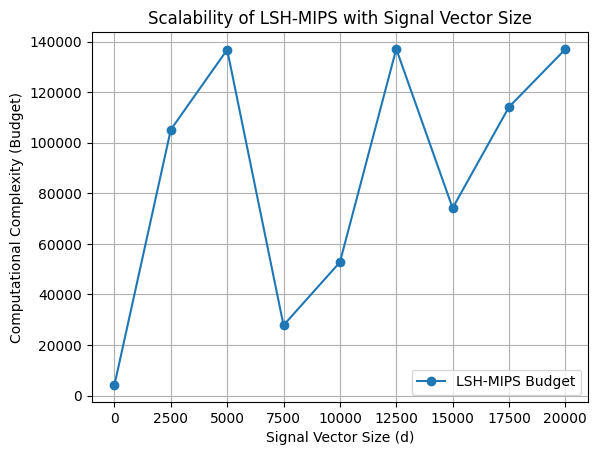

In [20]:
dimensions = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
results = []

for d in dimensions:
    # Reduce dimensions of movie_factors
    atoms_d = movie_factors[:, :d]
    signal_d = user_factors[:d]

    lsh_mips.preprocess_data(atoms_d)
    lsh_mips.preprocess_query(signal_d)
    _, budget = lsh_mips.run(top_k=10)

    results.append((d, budget))

# Plot results
import matplotlib.pyplot as plt
dimensions, budgets = zip(*results)
plt.plot(dimensions, budgets, marker="o", label="LSH-MIPS Budget")
plt.xlabel("Signal Vector Size (d)")
plt.ylabel("Computational Complexity (Budget)")
plt.title("Scalability of LSH-MIPS with Signal Vector Size")
plt.legend()
plt.grid()
plt.show()


Crypto-Pairs

In [10]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from algorithms.lsh_mips import LSH_MIPS

# Load the preprocessed dataset
dataset_path = "../BanditMIPS/data/crypto_pairs/crypto_pairs_1m_dimensions.npy"  # Path to the saved .npy file
crypto_data = np.load(dataset_path, allow_pickle=True)

# Step 1: Use Truncated SVD to reduce dimensionality (if necessary)
svd = TruncatedSVD(n_components=50)  # Reduce to 50 dimensions
atoms = svd.fit_transform(crypto_data)  # The reduced dataset

# Step 2: Create a query signal
# Example: Use the first crypto pair as the query vector
query_index = 0
signal = atoms[query_index]  # A single crypto pair's embedding

# Step 3: Initialize and run LSH-MIPS
lsh_mips = LSH_MIPS(m=3, num_hfunc=5, num_tables=10, type="ASYMMETRIC")
lsh_mips.preprocess_data(atoms)  # Preprocess the dataset
lsh_mips.preprocess_query(signal)  # Preprocess the query vector

# Step 4: Retrieve top-k candidates
top_k = 10
candidates, budget = lsh_mips.run(top_k=top_k)

# Step 5: Evaluate with naive method for comparison
inner_products = np.dot(atoms, signal)
top_k_naive = np.argsort(inner_products)[-top_k:]

# Compare results
accuracy = len(np.intersect1d(candidates, top_k_naive)) / top_k
print(f"Top {top_k} candidates: {candidates}")
print(f"Budget (number of computations): {budget}")
print(f"Accuracy compared to naive method: {accuracy * 100:.2f}%")


Top 10 candidates: [2]
Budget (number of computations): 2756
Accuracy compared to naive method: 10.00%


In [11]:
top_k_naive

array([ 49,  57, 104,  35,  97,  58,   2,  51,  28,  13], dtype=int64)